In [ ]:
import re

def extract_vmaf_mean_from_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Ищем строку с меткой vmaf и извлекаем значение после mean=""
    match = re.search(r'<metric name="vmaf"[^>]*mean="([^"]+)"', content)

    if match:
        return float(match.group(1))
    else:
        return None

files = ['vmafOutput.txt', 'vmafOutput1.txt', 'vmafOutput2.txt', 'vmafOutput3.txt', 'vmafOutput4.txt', 'vmafOutput5.txt']
vmaf_scores = []
bitrate = [102, 237, 489, 694, 1260, 2585]

for file in files:
    vmaf_mean = extract_vmaf_mean_from_file(file)
    if vmaf_mean is not None:
        print(f'Файл {file}: mean={vmaf_mean}')
        vmaf_scores.append(vmaf_mean)
    else:
        print(f'Файл {file}: Не удалось найти значение mean.')

Файл vmafOutput.txt: mean=1.449017
Файл vmafOutput1.txt: mean=16.524341
Файл vmafOutput2.txt: mean=58.119913
Файл vmafOutput3.txt: mean=72.429466
Файл vmafOutput4.txt: mean=85.4569
Файл vmafOutput5.txt: mean=93.260128


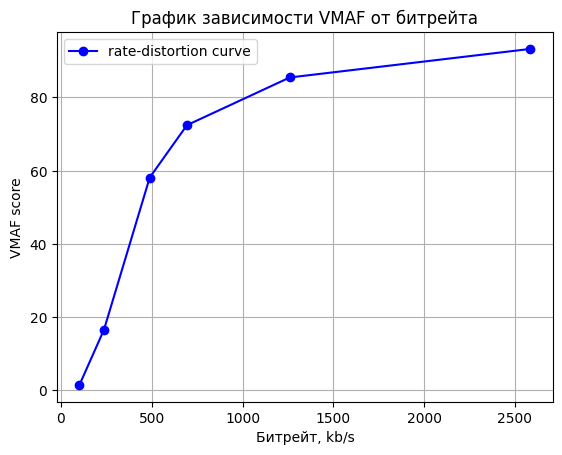

In [8]:
import matplotlib.pyplot as plt

plt.plot(bitrate, vmaf_scores, marker="o", label="rate-distortion curve", color='b')
plt.xlabel("Битрейт, kb/s")
plt.ylabel("VMAF score")
plt.title("График зависимости VMAF от битрейта")
plt.grid(True)
plt.legend()
plt.savefig("rate-distortion curve.png")
plt.show()